In [1]:
%matplotlib widget
# This line can be deleted but it's just to allow nicer plots


from amftrack.util.sys import (

    update_plate_info,
    get_current_folders,
)

from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_all_edges,

    plot_edge_color_value,
)

import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)

from matplotlib import cm

from amftrack.pipeline.functions.post_processing.exp_plot import *

C:\Users\coren\Documents\PhD\paper\travelling_wave\AMFTravellingWave\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
directory_targ = r"data/"

In [3]:
update_plate_info(directory_targ, local=True,strong_constraint = False)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
folders = all_folders.loc[all_folders["unique_id"] == "111111_20600101"]
# here select the plate you're interested in
folders = folders.sort_values(by="datetime")
# here select the timesteps you're interested in
folders = folders.iloc[0:2]
folders

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,unique_id,datetime
0,data/20220504_1900_Plate02,111111,2,'Carrot','C2','001P100N200C','Y','-',20600101,25,...,False,False,True,True,True,True,"04.05.2022, 19:00:",20220504_1900_Plate02,111111_20600101,2022-05-04 19:00:00
1,data/20220504_2100_Plate02,111111,2,'Carrot','C2','001P100N200C','Y','-',20600101,25,...,True,False,True,True,True,True,"04.05.2022, 21:00:",20220504_2100_Plate02,111111_20600101,2022-05-04 21:00:00


In [6]:
# load the experiment object
exp = Experiment(directory_targ)
exp.load(folders)
exp.dates.sort()
for t in range(len(folders)):
    exp.load_tile_information(t)

2022-05-04 19:00:00
2022-05-04 21:00:00


In [7]:
# chose a timestep
t = 0

C:\Users\coren\AppData\Local\Temp\ipykernel_6140\64461371.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=cm.get_cmap("viridis", 100),


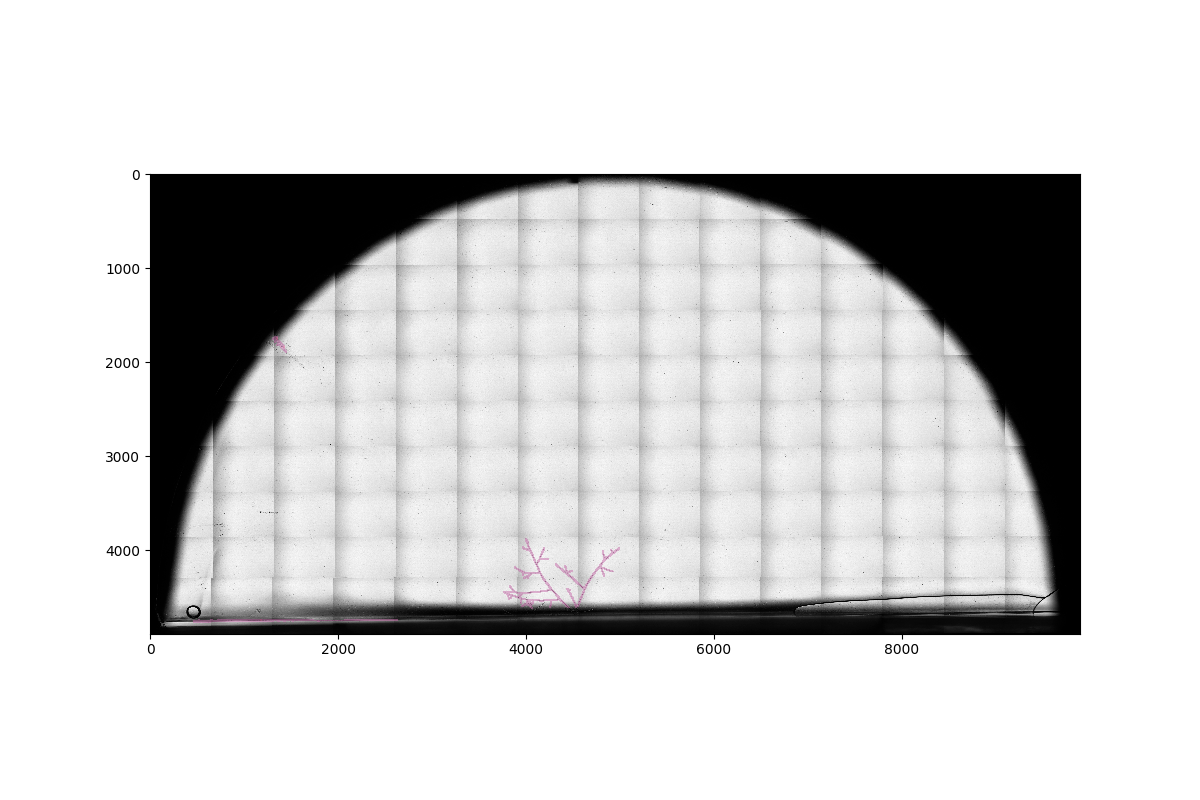

In [8]:
plt.close("all")
vmax = 1e2
vmin = 0
fig,ax = plot_edge_color_value(
    exp,
    t,
    lambda edge: edge.length_um(t),
    cmap=cm.get_cmap("viridis", 100),
    v_min=vmin,
    v_max=vmax,
    plot_cmap=False,
    show_background=True,
    dilation=20,
    figsize=(12, 8),
)

***Get the network_x object of a given timestep t***

In [14]:
nx_graph, pos = exp.nx_graph[t], exp.positions[t]
cycle_basis = nx.cycle_basis(nx_graph)  # example of a nx graph function

***Work with class Node and edge***

In [36]:
node = exp.nodes[12]
edges = exp.nodes[12].edges(t)
width = [edge.width(t) for edge in edges]
lengths = [
    edge.length_um(t) for edge in edges if edge.width(t) > 0
]

In [40]:
lengths = [
    edge.length_um(t) for edge in get_all_edges(exp,t) if edge.width(t) > 0
]
lengths

[45.1648362576315,
 174.25371908671696,
 85.3750522112939,
 208.5351310645244,
 313.2789743709683,
 142.77031494691585,
 285.6426350671713,
 73.0292881540542,
 251.2405742897816,
 37.95,
 44.85,
 50.206574809720586,
 100.23157480972058,
 45.788406460672746,
 72.45,
 43.125,
 117.35400593139835,
 245.7531210954061,
 148.4900413778319,
 31.136035446433535,
 41.400000000000006,
 53.475,
 74.90867912707967,
 86.1222828777374,
 253.95002279447166,
 78.25220433597501,
 31.05,
 83.07525757570302,
 281.91598112823704,
 43.125,
 104.34556417430424,
 69.25810633930061,
 81.41238120709794,
 146.4284667943543,
 65.97530734701404,
 192.93156834515926,
 78.85193183470034,
 154.37305123855606,
 71.58176482392696,
 206.59531494691586,
 105.31103544643354,
 65.72207089286708,
 93.41761025615412,
 71.31379207090772,
 172.6432999978836,
 32.775,
 86.79730638384888,
 55.2,
 72.45,
 75.9,
 46.75657480972058,
 41.363656814316606,
 65.14212064950298,
 107.03603544643354,
 101.0753617318166,
 69.0,
 105.60371